## BENGALURU HOUSING PRICES

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Dataset Structure

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Shows:

column names

data types

missing values

memory usage

This tells you immediately what needs cleaning (and this dataset will need cleaning).

In [11]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

shows :
null values in the data set 

#### Statistical Summary

In [12]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


Description

Basic stats:

mean

std

min / max

quartiles

Use this to detect:

extreme values

weird distributions

scaling issues

#### Dataset Structure

In [15]:
print("Duplicates:", data.duplicated().sum())

Duplicates: 529


Duplicates bias the model and distort distributions.

## EDA

#### Price Distribution

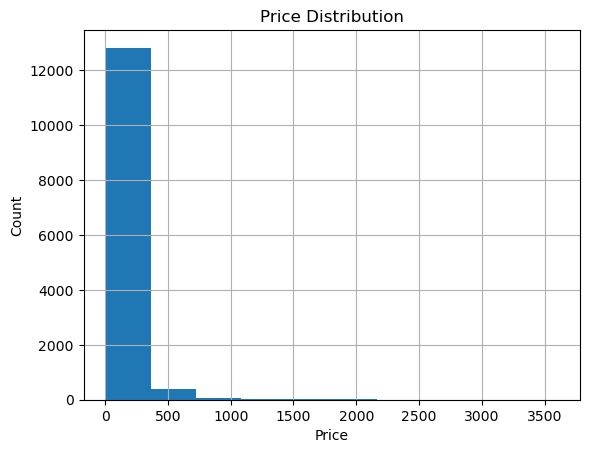

In [17]:
plt.figure()
data["price"].hist()
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Shows how target variable behaves.
Usually right-skewed in housing datasets.

 #### Numerical Feature Distributions

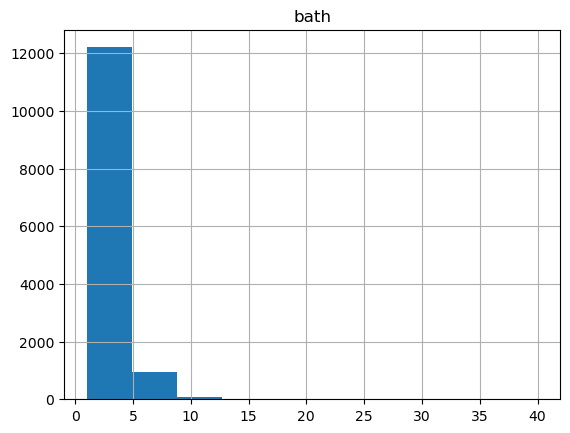

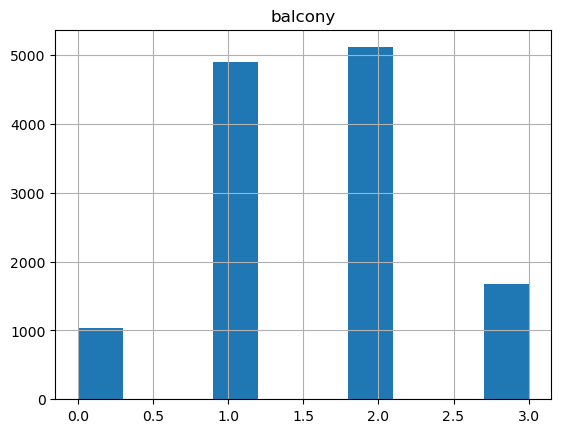

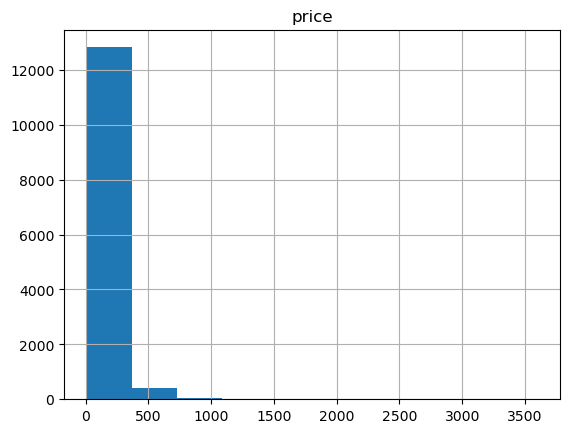

In [20]:
num_cols = data.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure()
    data[col].hist()
    plt.title(col)
    plt.show()


Quickly checks:

outliers

skewness

feature ranges

#### Correlation Analysis

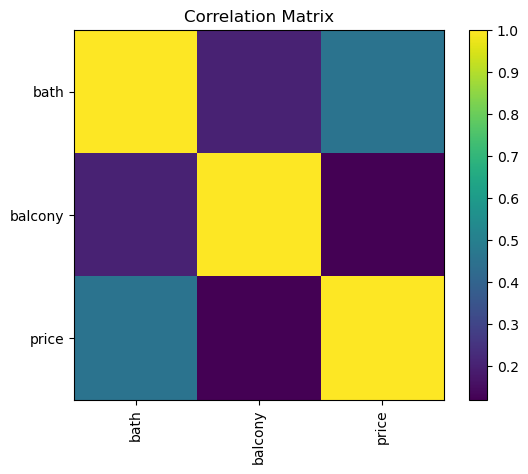

In [21]:
corr = data.corr(numeric_only=True)

plt.figure()
plt.imshow(corr)
plt.title("Correlation Matrix")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


Shows relationships between numeric variables.
You’ll likely see:

sqft strongly linked with price

bath somewhat correlated.

#### Feature Importance Plot

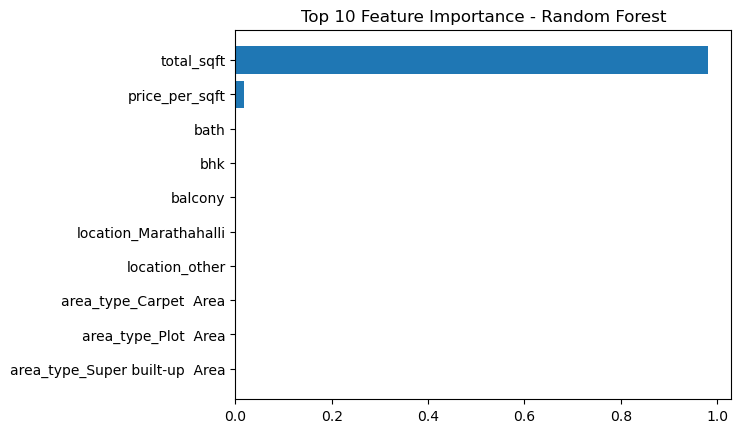

In [63]:
# Get importance values
importances = rf.feature_importances_

# Create dataframe
feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
})

# Sort values
feat_imp = feat_imp.sort_values("importance", ascending=False)

# Show top 10 features
top10 = feat_imp.head(10)

# Plot
plt.figure()
plt.barh(top10["feature"], top10["importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importance - Random Forest")
plt.show()


Takes importance from trained model

Sorts features

Shows top 10 most important

Horizontal bar chart = easy to read

#### Unique Locations

In [23]:
data["location"].value_counts().head(10)

location
Whitefield               540
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
Thanisandra              234
Yelahanka                213
Uttarahalli              186
Hebbal                   177
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: count, dtype: int64

Helps you understand which areas dominate.
Later you’ll group rare locations.

### EDA Summary 

Dataset contains housing features like location, size, square footage, bathrooms, and price.

Several columns contain missing values that require preprocessing.

Price distribution is skewed, indicating presence of high-value outliers.

Numerical variables show varying ranges, suggesting normalization or scaling may help modeling.

Location is a high-cardinality categorical feature and will need grouping or encoding.

## MODEL BUILDING

#### Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load Dataset

In [38]:
df = pd.read_csv("Bengaluru_House_Data.csv")

print(df.shape)
df.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### Basic Cleaning

In [39]:
# Drop duplicates
df = df.drop_duplicates()

# Remove rows where price missing
df = df.dropna(subset=["price"])

#### Feature Engineering

In [40]:
df["bhk"] = df["size"].str.extract("(\d+)").astype(float)

In [41]:
def convert_sqft(x):
    try:
        if isinstance(x, str) and "-" in x:
            a, b = x.split("-")
            return (float(a) + float(b)) / 2
        return float(x)
    except:
        return np.nan

df["total_sqft"] = df["total_sqft"].apply(convert_sqft)

In [42]:
df = df.dropna(subset=["total_sqft", "bath", "bhk"])

In [43]:
df["price_per_sqft"] = (df["price"] * 100000) / df["total_sqft"]

#### Remove Outliers

In [47]:
# Unrealistic sqft per bhk
df = df[df["total_sqft"] / df["bhk"] >= 300]

# price_per_sqft filtering
m = df["price_per_sqft"].mean()
s = df["price_per_sqft"].std()

df = df[(df["price_per_sqft"] > (m - s)) & (df["price_per_sqft"] < (m + s))]

#### Fix Location

In [49]:
df["location"] = df["location"].fillna("other")

loc_count = df["location"].value_counts()
df["location"] = df["location"].apply(lambda x: x if loc_count[x] >= 10 else "other")

#### Select Features

In [50]:
# Target
y = df["price"]

# Drop useless text columns
X = df.drop(["price", "size", "society", "availability"], axis=1, errors="ignore")

In [51]:
X = pd.get_dummies(X, drop_first=True)

In [52]:
X["total_sqft"] = pd.to_numeric(X["total_sqft"], errors="coerce")

In [53]:
X = X.dropna()
y = y.loc[X.index]

In [54]:
print(X.select_dtypes(include="object").columns)

Index([], dtype='object')


#### Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Linear Regression Model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

print("Linear Regression")
print("Train R2:", r2_score(y_train, lr_train_pred))
print("Test R2 :", r2_score(y_test, lr_test_pred))

Linear Regression
Train R2: 0.9972959179255289
Test R2 : 0.9968810496780219


### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

print("\nDecision Tree")
print("Train R2:", r2_score(y_train, dt_train_pred))
print("Test R2 :", r2_score(y_test, dt_test_pred))


Decision Tree
Train R2: 1.0
Test R2 : 0.9511979904514523


### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

print("\nRandom Forest")
print("Train R2:", r2_score(y_train, rf_train_pred))
print("Test R2 :", r2_score(y_test, rf_test_pred))


Random Forest
Train R2: 0.9995228245122758
Test R2 : 0.9588260545484029


### Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

gb_train_pred = gb.predict(X_train)
gb_test_pred = gb.predict(X_test)

print("\nGradient Boosting")
print("Train R2:", r2_score(y_train, gb_train_pred))
print("Test R2 :", r2_score(y_test, gb_test_pred))


Gradient Boosting
Train R2: 0.9995865371026248
Test R2 : 0.9660542540624598


#### Compare 4 Models

In [ ]:
# Predictions
lr_train = lr.predict(X_train)
lr_test  = lr.predict(X_test)

dt_train = dt.predict(X_train)
dt_test  = dt.predict(X_test)

rf_train = rf.predict(X_train)
rf_test  = rf.predict(X_test)

gb_train = gb.predict(X_train)
gb_test  = gb.predict(X_test)

# Create comparison table
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting"
    ],
    "Train R2": [
        r2_score(y_train, lr_train),
        r2_score(y_train, dt_train),
        r2_score(y_train, rf_train),
        r2_score(y_train, gb_train)
    ],
    "Test R2": [
        r2_score(y_test, lr_test),
        r2_score(y_test, dt_test),
        r2_score(y_test, rf_test),
        r2_score(y_test, gb_test)
    ]
})

print(results)


#### Cross-Validation Score

In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gb, X, y, cv=5, scoring="r2")
print("CV R2 scores:", scores)
print("Average CV R2:", scores.mean())

CV R2 scores: [0.99895808 0.97955624 0.99833983 0.99792585 0.99626024]
Average CV R2: 0.9942080478824209


#### MODEL OPTIMIZATIONS 

#### Linear Regression — GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr_params = {
    "fit_intercept": [True, False]
}

lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring="r2")
lr_grid.fit(X_train, y_train)

best_lr = lr_grid.best_estimator_

print("Best LR Params:", lr_grid.best_params_)
print("Best LR CV Score:", lr_grid.best_score_)

Best LR Params: {'fit_intercept': True}
Best LR CV Score: 0.9970035772293266


#### Decision Tree — GridSearchCV

In [69]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt_params = {
    "max_depth": [5,10,20,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring="r2", n_jobs=-1)
dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_

print("Best DT Params:", dt_grid.best_params_)
print("Best DT CV Score:", dt_grid.best_score_)

Best DT Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best DT CV Score: 0.9935618429792396


#### Random Forest — GridSearchCV

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf_params = {
    "n_estimators": [100,200],
    "max_depth": [10,20,None],
    "min_samples_split": [2,5],
    "min_samples_leaf": [1,2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="r2", n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_

print("Best RF Params:", rf_grid.best_params_)
print("Best RF CV Score:", rf_grid.best_score_)

Best RF Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best RF CV Score: 0.995790937793493


#### Gradient Boosting — GridSearchCV

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)

gb_params = {
    "n_estimators": [100,200],
    "learning_rate": [0.05,0.1,0.2],
    "max_depth": [3,4,5]
}

gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring="r2", n_jobs=-1)
gb_grid.fit(X_train, y_train)

best_gb = gb_grid.best_estimator_

print("Best GB Params:", gb_grid.best_params_)
print("Best GB CV Score:", gb_grid.best_score_)

Best GB Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best GB CV Score: 0.99777275828702


### Evaluate Tuned Models

In [72]:
from sklearn.metrics import r2_score

models = {
    "LR": best_lr,
    "DT": best_dt,
    "RF": best_rf,
    "GB": best_gb
}

for name, model in models.items():
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))
    
    print(f"\n{name}")
    print("Train R2:", train_r2)
    print("Test R2 :", test_r2)


LR
Train R2: 0.9972959179255289
Test R2 : 0.9968810496780219

DT
Train R2: 0.9994885704345818
Test R2 : 0.9696617744028706

RF
Train R2: 0.9990541880970331
Test R2 : 0.9590789522277611

GB
Train R2: 0.9998402323979713
Test R2 : 0.9675081823203753
